In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Import data

In [44]:
df = pd.read_excel('data/wifi.xlsx', sheet_name='Main data')
df = df[['ssid', 'mackonversi', 'rssi', 'lokasi']]
df

,ssid,mackonversi,rssi,lokasi
0,KRAI,273146522812986,-86,Perpustakaan D4
1,eepisMobile,264428361941459,-85,Perpustakaan D4
2,eepiswlan,211266695032288,-88,Perpustakaan D4
3,eepisGuest,264428361175954,-62,Perpustakaan D4
4,eepisGuest,211266695032290,-87,Perpustakaan D4
...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca
2241,senatGuest,113506318785,-76,Perpustakaan Pasca
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca


## Preprocessing

In [3]:
# # Misal df adalah dataframe kamu
# le = LabelEncoder()
# df['mackonversi_encoded'] = le.fit_transform(df['mackonversi'])
# df['ssid_encoded'] = le.fit_transform(df['ssid'])
# df['lokasi_encoded'] = le.fit_transform(df['lokasi'])

In [45]:
# Label Encoder untuk masing-masing kolom
# le_mackonversi = LabelEncoder()
le_ssid = LabelEncoder()
le_lokasi = LabelEncoder()

# df['mackonversi_encoded'] = le_mackonversi.fit_transform(df['mackonversi'])
df['ssid_encoded'] = le_ssid.fit_transform(df['ssid'])
df['lokasi_encoded'] = le_lokasi.fit_transform(df['lokasi'])

In [46]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


In [47]:
df = df[df['lokasi_encoded'].isin([1, 2, 3])]

In [27]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
452,eepiswlanXpress,277468729232785,-87,Lab E204 D4,151,3
453,eepiswlan,264428361941568,-78,Lab E204 D4,149,3
454,PunyaOrangJanDipake,191717452759593,-89,Lab E204 D4,102,3
455,eepisMobile,277468729232787,-88,Lab E204 D4,148,3
456,eepiswlanXpress,264428361849073,-81,Lab E204 D4,151,3
...,...,...,...,...,...,...
1188,eepisGuest,264428357481761,-83,Kantin Pasca,147,2
1189,eepisGuest,220077978542338,-80,Kantin Pasca,147,2
1190,admin,178128971488785,-90,Kantin Pasca,139,2
1191,eepisMobile,220077978539203,-90,Kantin Pasca,148,2


In [48]:
print("\nMapping lokasi:")
for label, code in zip(le_lokasi.classes_, le_lokasi.transform(le_lokasi.classes_)):
    print(f"{label} -> {code}")


Mapping lokasi:
Cafetaria Pasca -> 0
Kantin D3 -> 1
Kantin Pasca -> 2
Lab E204 D4 -> 3
Musholla D4 -> 4
Musholla Saw -> 5
Perpustakaan D4 -> 6
Perpustakaan Pasca -> 7
Saw 0808 -> 8
Sekber D4 -> 9


In [6]:
# # Simpan Label Encoders
# joblib.dump(le_mackonversi, 'encoders/le_mackonversi.pkl')
# joblib.dump(le_ssid, 'encoders/le_ssid.pkl')
# joblib.dump(le_lokasi, 'encoders/le_lokasi.pkl')

In [7]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


## Visualization

C:\Users\MuhammadAulia\AppData\Local\Temp\ipykernel_5652\2162372602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top5_lokasi, x='lokasi', y='jumlah', palette='Blues')


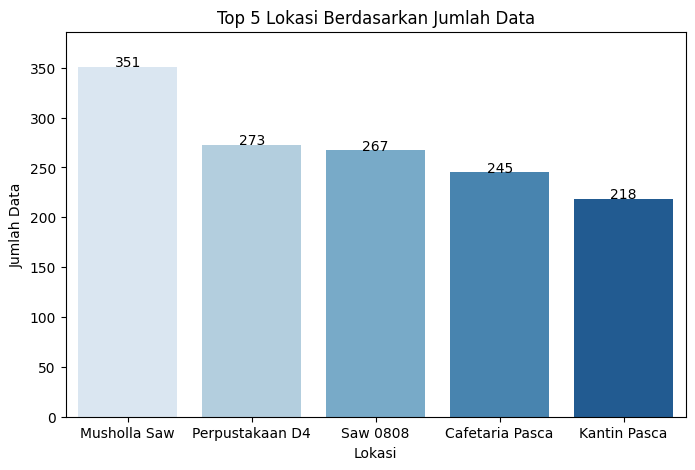

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil top 5 lokasi berdasarkan jumlah data
top5_lokasi = df['lokasi'].value_counts().nlargest(5).reset_index()
top5_lokasi.columns = ['lokasi', 'jumlah']

plt.figure(figsize=(8,5))
barplot = sns.barplot(data=top5_lokasi, x='lokasi', y='jumlah', palette='Blues')

# Tambahkan angka di atas batang
for index, row in top5_lokasi.iterrows():
    barplot.text(index, row.jumlah + 0.5,  # posisi teks: sedikit di atas batang
                 round(row.jumlah, 0), 
                 color='black', ha="center")

plt.title('Top 5 Lokasi Berdasarkan Jumlah Data')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Data')
plt.ylim(0, top5_lokasi['jumlah'].max() * 1.1)  # sedikit spasi atas batang
plt.show()

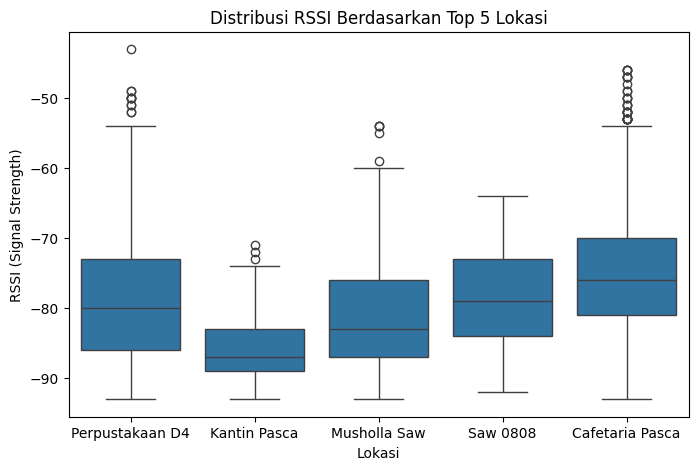

In [9]:
# Cari top 5 lokasi berdasarkan frekuensi kemunculan
top5_lokasi = df['lokasi'].value_counts().nlargest(5).index

# Filter dataframe hanya untuk lokasi top 5
df_top5 = df[df['lokasi'].isin(top5_lokasi)]

# Plot boxplot untuk top 5 lokasi
plt.figure(figsize=(8,5))
sns.boxplot(data=df_top5, x='lokasi', y='rssi')
plt.title('Distribusi RSSI Berdasarkan Top 5 Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('RSSI (Signal Strength)')
plt.show()

## Spliting Data

In [8]:
df

,ssid,mackonversi,rssi,lokasi,mackonversi_encoded,ssid_encoded,lokasi_encoded
452,eepiswlanXpress,277468729232785,-87,Lab E204 D4,434,151,3
453,eepiswlan,264428361941568,-78,Lab E204 D4,414,149,3
454,PunyaOrangJanDipake,191717452759593,-89,Lab E204 D4,162,102,3
455,eepisMobile,277468729232787,-88,Lab E204 D4,436,148,3
456,eepiswlanXpress,264428361849073,-81,Lab E204 D4,406,151,3
...,...,...,...,...,...,...,...
1188,eepisGuest,264428357481761,-83,Kantin Pasca,394,147,2
1189,eepisGuest,220077978542338,-80,Kantin Pasca,298,147,2
1190,admin,178128971488785,-90,Kantin Pasca,152,139,2
1191,eepisMobile,220077978539203,-90,Kantin Pasca,217,148,2


In [49]:
X=df[['mackonversi', 'ssid_encoded', 'rssi']]
y=df.lokasi_encoded

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Training Model (SVM, NBC, RandomForest, KNN)

In [51]:
### ===== 1. SVM =====
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'max_iter': [1000, 5000, 10000],
    'class_weight': [None, 'balanced']
}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid_svm, refit=True, verbose=3, cv=5, return_train_score=True)
grid_svc.fit(x_train, y_train)
joblib.dump(grid_svc, 'models/model_svm.pkl')
akurasi_SVM = round(accuracy_score(y_test, grid_svc.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.317, test=0.313) total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.316, test=0.317) total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.316, test=0.317) total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.316, test=0.317) total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.316, test=0.317) total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=5000;, score=(train=0.317, test=0.313) total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=5000;, score=(train=0.316, test=0.317) total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=1, 

In [52]:
### ===== 2. Gaussian Naive Bayes =====
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, param_grid_gnb, refit=True, verbose=3, cv=5)
grid_gnb.fit(x_train, y_train)
joblib.dump(grid_gnb, 'models/model_gnb.pkl')
akurasi_GNB = round(accuracy_score(y_test, grid_gnb.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.554 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.549 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.537 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.537 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.524 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.554 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.549 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.537 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.537 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.524 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.554 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [53]:
### ===== 3. Random Forest =====
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, refit=True, verbose=3, cv=5)
grid_rf.fit(x_train, y_train)
joblib.dump(grid_rf, 'models/model_rf.pkl')
akurasi_RF = round(accuracy_score(y_test, grid_rf.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.0s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.915 total time=   0.0s
[CV 4/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.963 total time=   0.0s
[CV 5/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.976 total time=   0.0s
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.964 total time=   0.0s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.939 total time=   0.0s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.927 total time

In [54]:
from sklearn.neighbors import KNeighborsClassifier

### ===== 4. KNN =====
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, refit=True, verbose=3, cv=5)
grid_knn.fit(x_train, y_train)
joblib.dump(grid_knn, 'models/model_knn.pkl')
akurasi_KNN = round(accuracy_score(y_test, grid_knn.predict(x_test)) * 100, 2)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.916 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.951 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.902 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.963 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.964 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.963 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.963 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.976 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 tota

In [55]:
### ===== Simpan LabelEncoders =====
# joblib.dump(le_mackonversi, 'encoders/le_mackonversi.pkl')
joblib.dump(le_ssid, 'encoders/le_ssid.pkl')
joblib.dump(le_lokasi, 'encoders/le_lokasi.pkl')

['encoders/le_lokasi.pkl']

## Model Evaluation

In [56]:
print("\n--- Akurasi Model ---")
print(f"SVM : {akurasi_SVM}%")
print(f"GNB : {akurasi_GNB}%")
print(f"RF  : {akurasi_RF}%")
print(f"KNN : {akurasi_KNN}%")
print("\n✅ Semua model & encoder berhasil disimpan.")


--- Akurasi Model ---
SVM : 83.62%
GNB : 50.28%
RF  : 94.92%
KNN : 96.05%

✅ Semua model & encoder berhasil disimpan.


In [57]:
def get_metrics(model_name, y_test, y_pred):
    return {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    }

y_pred_svm = grid_svc.predict(x_test)
y_pred_gnb = grid_gnb.predict(x_test)
y_pred_rf = grid_rf.predict(x_test)
y_pred_knn = grid_knn.predict(x_test)

all_results = []

all_results.append(get_metrics('SVM', y_test, y_pred_svm))
all_results.append(get_metrics('GaussianNB', y_test, y_pred_gnb))
all_results.append(get_metrics('RandomForest', y_test, y_pred_rf))
all_results.append(get_metrics('KNN', y_test, y_pred_knn))

evaluation_df = pd.DataFrame(all_results)

print("\nHasil Evaluasi Semua Model:")
evaluation_df


Hasil Evaluasi Semua Model:


c:\Users\MuhammadAulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,83.62,89.02,83.62,83.57
1,GaussianNB,50.28,35.21,50.28,39.60
2,RandomForest,94.92,95.17,94.92,94.92
3,KNN,96.05,96.09,96.05,96.04


10 lokasi
svm -> 67
nbc -> 15

3 lokasi
svm -> 96
nbc -> 67


In [ ]:
svm 

## Export Model

In [19]:
# import joblib

# # Simpan model ke dalam file pickle
# joblib.dump(grid_svc.best_estimator_, 'model/model_svm.pkl')
# joblib.dump(grid_gnb.best_estimator_, 'model/model_gnb.pkl')i
# joblib.dump(grid_rf.best_estimator_, 'model/model_rf.pkl')
# joblib.dump(grid_knn.best_estimator_, 'model/model_knn.pkl')

# print("Semua model telah disimpan sebagai file pickle.")

## Testing

In [20]:
data_test

,ssid,mackonversi,rssi
0,KRAI,273146522812986,-86
1,eepisMobile,264428361941459,-85
2,eepiswlan,211266695032288,-88
3,eepisGuest,264428361175954,-62
4,eepisGuest,211266695032290,-87
...,...,...,...
2239,eepisGuest,220077978544770,-82
2240,Lab Emerge _ WSC,158746488395693,-80
2241,senatGuest,113506318785,-76
2242,ZTE_2.4G_YYsFKz,57330268306608,-87


In [59]:
# === 1. Load Semua Model dan Encoder ===
model_svm = joblib.load('models/model_svm.pkl')
model_gnb = joblib.load('models/model_gnb.pkl')
model_rf = joblib.load('models/model_rf.pkl')
model_knn = joblib.load('models/model_knn.pkl')

le_ssid = joblib.load('encoders/le_ssid.pkl')
le_lokasi = joblib.load('encoders/le_lokasi.pkl')

# === 2. Load Data Testing ===
lokasi_target = 'Kantin Pasca'
data_test = pd.read_excel('data/wifi.xlsx', sheet_name=lokasi_target)
data_test = data_test[['ssid', 'mackonversi', 'rssi']]

# === 3. Tangani SSID Tidak Dikenal ===
ssid_dikenal = set(le_ssid.classes_)
data_test = data_test[data_test['ssid'].isin(ssid_dikenal)].copy()

# === 4. Encode SSID ===
data_test['ssid_encoded'] = le_ssid.transform(data_test['ssid'])

# === 5. Siapkan Fitur ===
X_test = data_test[['mackonversi', 'ssid_encoded', 'rssi']]

# === 6. Prediksi dari Semua Model ===
pred_svm = le_lokasi.inverse_transform(model_svm.predict(X_test))
pred_gnb = le_lokasi.inverse_transform(model_gnb.predict(X_test))
pred_rf  = le_lokasi.inverse_transform(model_rf.predict(X_test))
pred_knn = le_lokasi.inverse_transform(model_knn.predict(X_test))

In [60]:
# === 7. Evaluasi Tepat/Tidak ===
def evaluasi_prediksi(prediksi, lokasi_target):
    return ['Tepat' if pred == lokasi_target else 'Tidak Tepat' for pred in prediksi]

eval_svm = evaluasi_prediksi(pred_svm, lokasi_target)
eval_gnb = evaluasi_prediksi(pred_gnb, lokasi_target)
eval_rf  = evaluasi_prediksi(pred_rf, lokasi_target)
eval_knn = evaluasi_prediksi(pred_knn, lokasi_target)

# === 8. Buat DataFrame Hasil ===
hasil_prediksi = data_test.copy()
hasil_prediksi['prediksi_lokasi_svm'] = pred_svm
hasil_prediksi['evaluasi_svm'] = eval_svm

hasil_prediksi['prediksi_lokasi_gnb'] = pred_gnb
hasil_prediksi['evaluasi_gnb'] = eval_gnb

hasil_prediksi['prediksi_lokasi_rf'] = pred_rf
hasil_prediksi['evaluasi_rf'] = eval_rf

hasil_prediksi['prediksi_lokasi_knn'] = pred_knn
hasil_prediksi['evaluasi_knn'] = eval_knn

# === 9. Hitung Ringkasan Tepat/Tidak ===
def hitung_summary(evaluasi_list):
    tepat = evaluasi_list.count('Tepat')
    tidak = evaluasi_list.count('Tidak Tepat')
    return tepat, tidak

In [61]:
summary = {
    'Model': ['SVM', 'GNB', 'RF', 'KNN'],
    'Tepat': [],
    'Tidak Tepat': []
}

for ev in [eval_svm, eval_gnb, eval_rf, eval_knn]:
    t, td = hitung_summary(ev)
    summary['Tepat'].append(t)
    summary['Tidak Tepat'].append(td)

summary_df = pd.DataFrame(summary)

print("DataFrame Hasil Prediksi:")
hasil_prediksi

DataFrame Hasil Prediksi:


,ssid,mackonversi,rssi,ssid_encoded,prediksi_lokasi_svm,evaluasi_svm,prediksi_lokasi_gnb,evaluasi_gnb,prediksi_lokasi_rf,evaluasi_rf,prediksi_lokasi_knn,evaluasi_knn
0,eepiswlan,220077978542689,-89,149,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
1,Miaw...,130555949880951,-87,85,Kantin Pasca,Tepat,Kantin D3,Tidak Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
2,eepisMobile,220077978548675,-91,148,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
3,ENT Room,132545742778042,-87,32,Kantin Pasca,Tepat,Kantin D3,Tidak Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
4,eepiswlan,220077978542337,-93,149,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
5,eepisMobile,220077978542691,-89,148,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
6,eepisMobile,264428357481762,-82,148,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
7,eepisGuest,220077978542690,-89,147,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
8,Lab Emerge _ Dosen,279389354008537,-87,72,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat
9,eepisGuest,220077978548386,-88,147,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat,Kantin Pasca,Tepat


In [ ]:
print("\nSummary Ketepatan Prediksi:")
summary_df


Summary Ketepatan Prediksi:


,Model,Tepat,Tidak Tepat
0,SVM,58,0
1,GNB,51,7
2,RF,56,2
3,KNN,58,0
